In [1]:
import pandas

import matplotlib.pyplot as plt

usecols = ["order_date", "sales"]

url = "/content/supernoprofit.csv"

reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

In [2]:
dater = "%d/%m/%Y"

origin = reader(url, usecols=usecols, parse_dates=usecols[:1], date_format=dater)

origin.iloc[:5]

,order_date,sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
2,2017-06-12,14.6200
3,2016-10-11,957.5775
4,2016-10-11,22.3680


In [3]:
origin.tail()

,order_date,sales
9795,2017-05-21,3.798
9796,2016-01-12,10.368
9797,2016-01-12,235.188
9798,2016-01-12,26.376
9799,2016-01-12,10.384


In [4]:
origin = origin.sort_values("order_date")

origin.isnull().sum().sum()

0

In [5]:
origin["order_date"].min()

Timestamp('2015-01-03 00:00:00')

In [6]:
origin["order_date"].max()

Timestamp('2018-12-30 00:00:00')

In [7]:
len(origin)

9800

In [8]:
origin["order_date"].dt.date.nunique()

1230

In [9]:
origin = origin.set_index("order_date")

origin.iloc[:5]

,sales
order_date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536


In [10]:
orator = origin.resample("D").mean()

orator.iloc[:5]

,sales
order_date,
2015-01-03,16.448000
2015-01-04,96.020000
2015-01-05,19.536000
2015-01-06,489.677778
2015-01-07,43.579000


In [11]:
origin[origin.index == "2015-01-04"]

,sales
order_date,
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784


In [12]:
origin[origin.index == "2015-01-04"].mean().item()

96.02

In [13]:
orator.isnull().sum().sum()

228

In [14]:
orator[orator.isnull()].iloc[:1]

,sales
order_date,
2015-01-03,NaN


In [15]:
origin[origin.index == "2015-01-03"]

,sales
order_date,
2015-01-03,16.448


In [16]:
orator = orator.interpolate(method='linear')

orator.isnull().sum().sum()

0

In [17]:
from statsmodels.tsa.stattools import adfuller

tester = adfuller(orator, autolag="AIC")

result_p = tester[1]

result_p

0.0

In [18]:
origin.resample("M").mean().isnull().sum().sum()

0

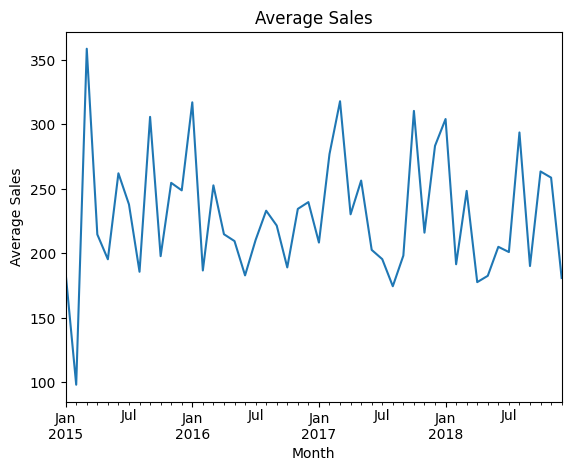

In [19]:
monthly = origin.resample("M").mean()

title = "Average Sales"

xlabel = "Month"

ylabel = "Average Sales"

monthly["sales"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

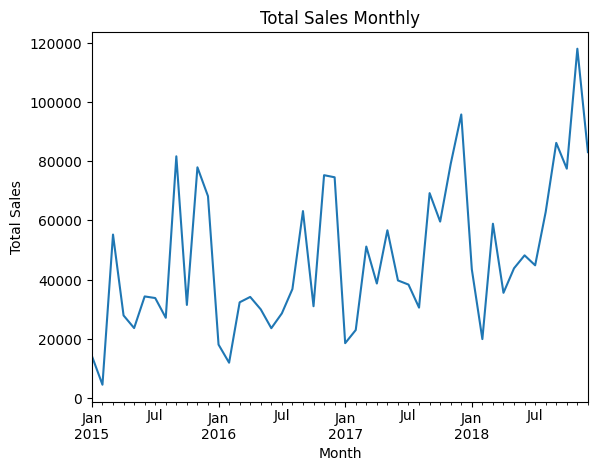

In [20]:
monthly = origin.resample("M").sum()

title = "Total Sales Monthly"

ylabel = "Total Sales"

monthly["sales"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

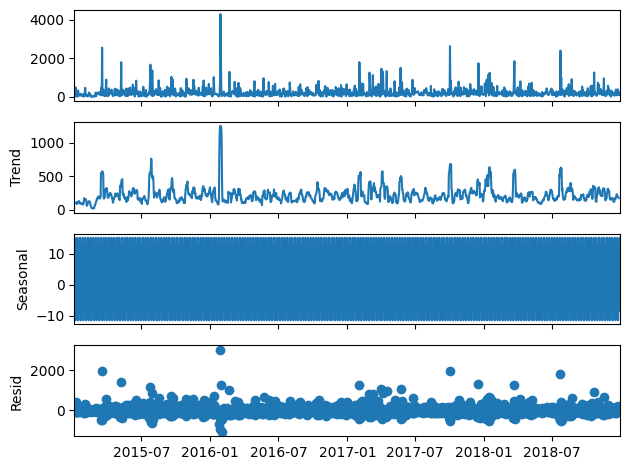

In [21]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(orator, model='additive')

cate = decomposition.plot();

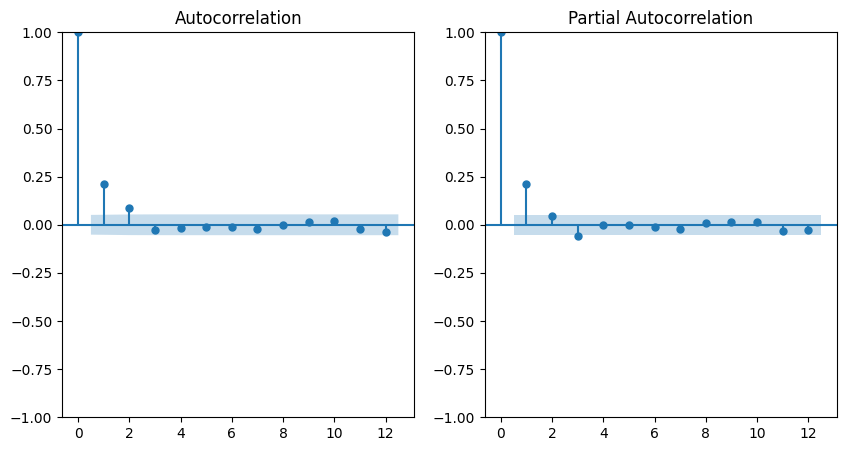

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(orator, lags=12, ax=axes[0])

plot_pacf(orator, lags=12, ax=axes[1]);

In [ ]:
!pip install pmdarima --quiet